# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

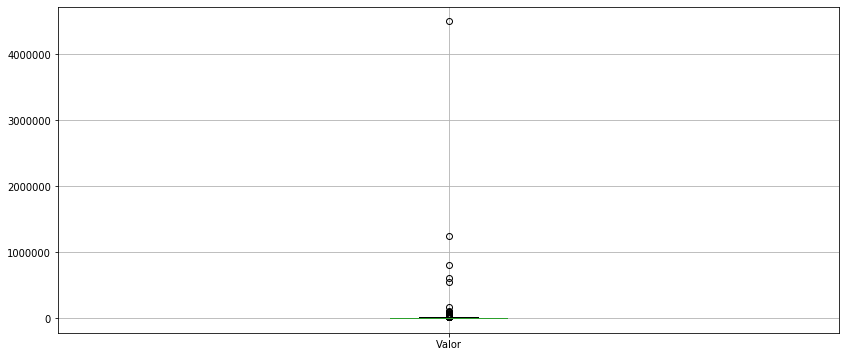

In [7]:
dados.boxplot(['Valor'])

In [8]:
selecao = dados['Valor'] > 500000
dados[selecao]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [27]:
valor = dados['Valor']

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new  = dados[selecao]

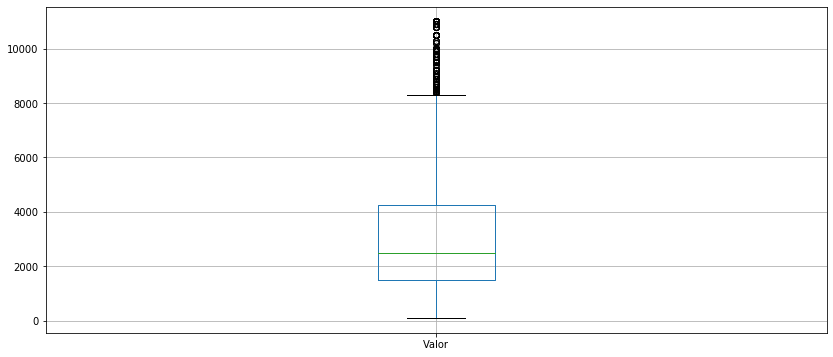

In [31]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000178D5C5FD08>]],
      dtype=object)

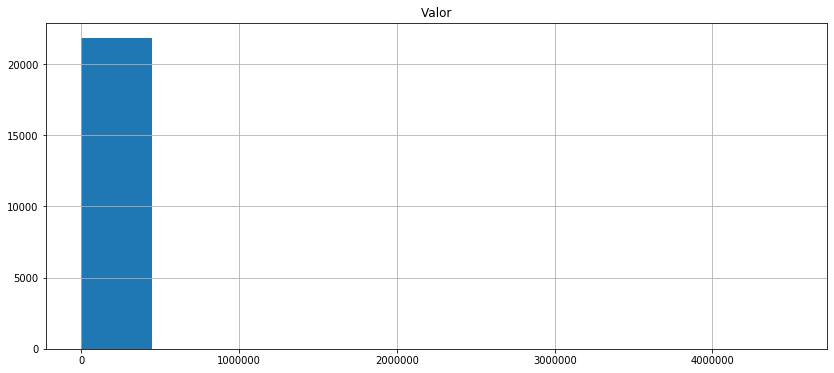

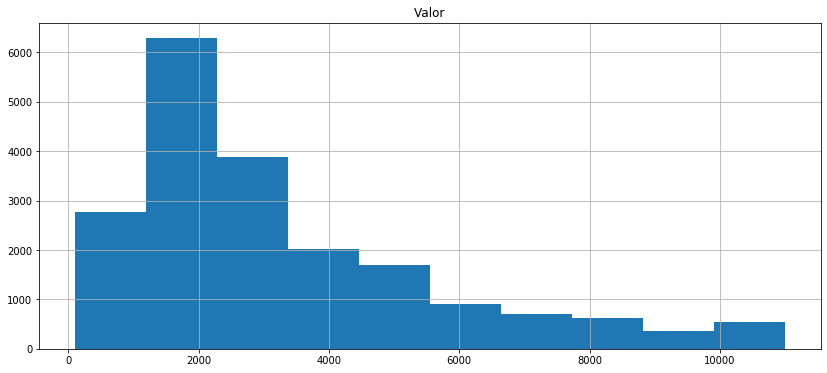

In [33]:
dados.hist('Valor')
dados_new.hist('Valor')

## Identificando e removendo outliers

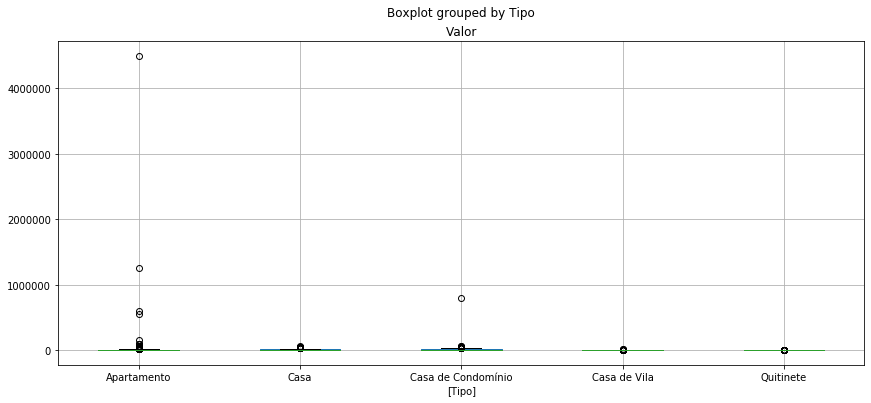

In [71]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [72]:
grupo_tipo = dados.groupby('Tipo')['Valor']

Q1 = grupo_tipo.quantile(0.25)
Q3 = grupo_tipo.quantile(0.75)

IIQ = Q3 - Q1

limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ


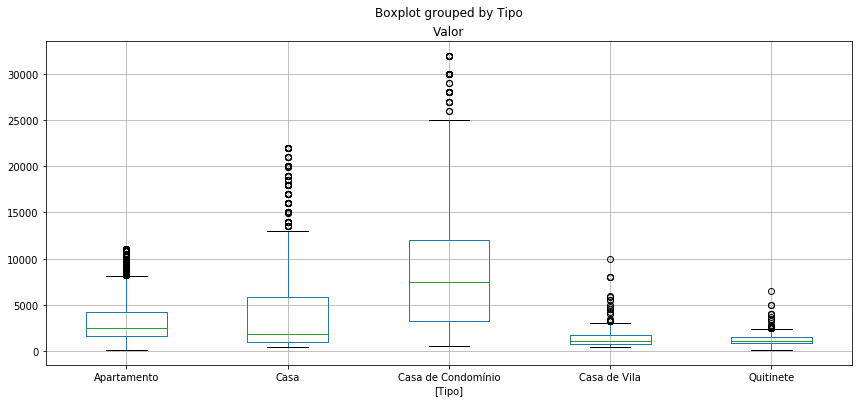

In [64]:
dados_new - pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_new = pd.concat([dados_new, dados[selecao]])
    
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [65]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)

In [76]:
dados_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59476 entries, 0 to 21822
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           59476 non-null  object 
 1   Bairro         59476 non-null  object 
 2   Quartos        59476 non-null  int64  
 3   Vagas          59476 non-null  int64  
 4   Suites         59476 non-null  int64  
 5   Area           59476 non-null  int64  
 6   Valor          59476 non-null  float64
 7   Condominio     59476 non-null  float64
 8   IPTU           59476 non-null  float64
 9   Valor m2       59476 non-null  float64
 10  Tipo Agregado  59476 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 5.4+ MB
